# 4.9 Task _ PArt 2

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [85]:
# Import ords_prods_merge Data set 

ords_prods_merge =pd.read_pickle(r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024\02 Data\Prepared Data\Prepared pkl files\ords_prods_merge_loyalty_spending_frequency_updated.pkl')

### Creating Bar Charts

In [5]:
ords_prods_merge.shape

(32404859, 26)

<Axes: xlabel='orders_day_of_week'>

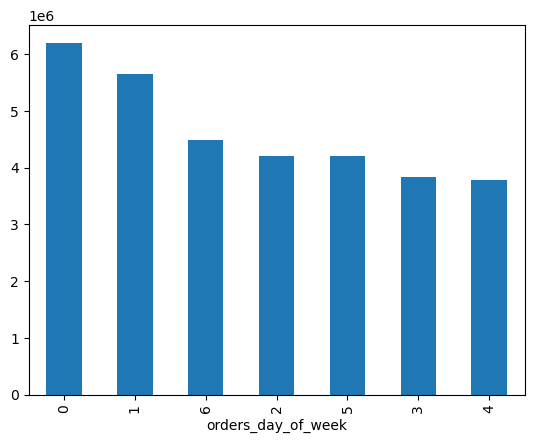

In [6]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

In [7]:
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

#### Sort data

In [8]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

In [1]:
# Define the number of colors in the range
num_colors = 7

In [19]:
# Choose the Greens colormap
colormap = plt.cm.Greens

In [20]:
# Create a list of colors using the colormap
colors = [colormap(i) for i in np.linspace(1, 0, num_colors)]


<Axes: xlabel='orders_day_of_week'>

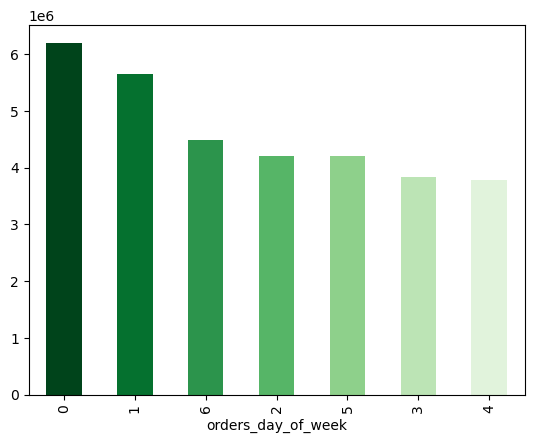

In [21]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=colors)

#### Save bar chart

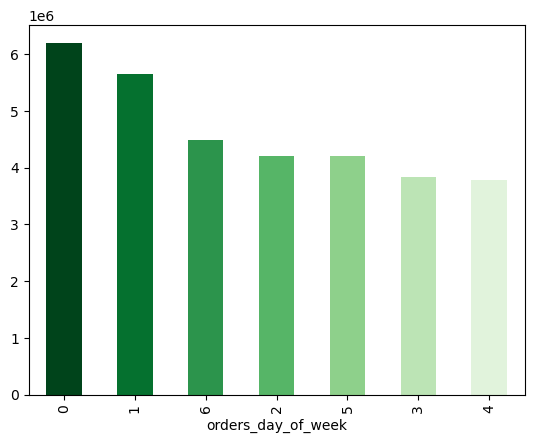

In [31]:
order_days_of_week_bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=colors)

#### Export Chart

In [33]:
order_days_of_week_bar.figure.savefig(r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations\order_days_of_week_bar')

## Creating a *"Histogram"* of the “prices” column

<Axes: ylabel='Frequency'>

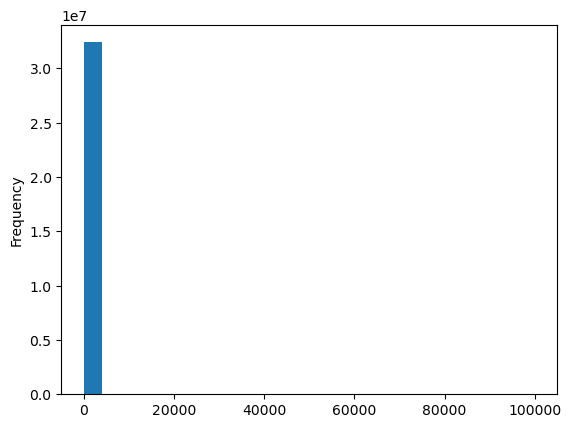

In [34]:
ords_prods_merge['prices'].plot.hist(bins = 25)

#### Data check for "prices" column

In [35]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

#### Further investigation on "prices" column data

In [38]:
ords_prods_merge['prices'].mean()

11.980225638383454

In [39]:
ords_prods_merge['prices'].median()

7.4

In [40]:
ords_prods_merge['prices'].max()

99999.0

### Create "Scatterplot"

<Axes: xlabel='prices', ylabel='prices'>

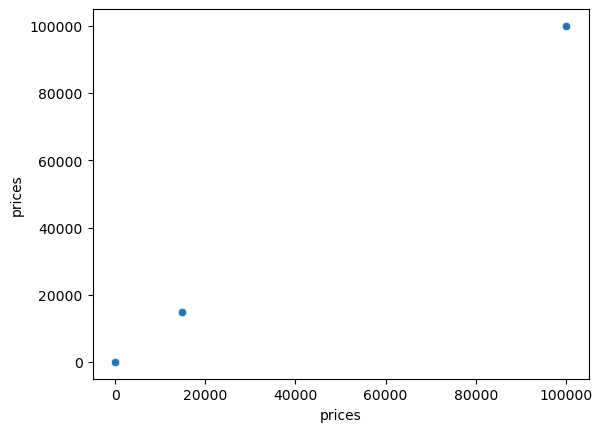

In [41]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

#### Check outliers of price data_ Item price more than 100

In [42]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_from_last_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending flag,frequency_of_purchase,order frequency flag
10030345,912404,17,12,2,14,5.0,21553,5,0,both,...,High-range product,Regularly busy,Regular days,Most_orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,both,...,High-range product,Regularly busy,Regular days,Most_orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,both,...,High-range product,Regularly busy,Regular days,Fewest_orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,both,...,High-range product,Busiest day,Busiest days,Average_orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,both,...,High-range product,Regularly busy,Busiest days,Average_orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,both,...,High-range product,Busiest day,Busiest days,Average_orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,both,...,High-range product,Busiest day,Busiest days,Most_orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,both,...,High-range product,Regularly busy,Slowest days,Most_orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,both,...,High-range product,Regularly busy,Slowest days,Fewest_orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


#### Mark unusual values/ Outliers as NaN untill investigate further

In [43]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

#### Check again on NaN value replacing step

In [44]:
ords_prods_merge['prices'].max()

25.0

#### 25 max is more logical 

### Create Histogram after data cleaning in Price column

<Axes: ylabel='Frequency'>

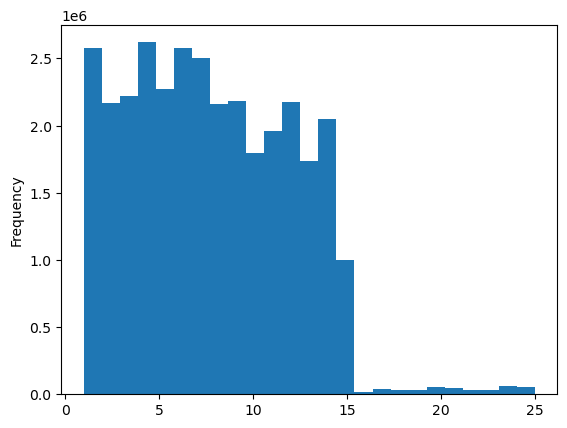

In [45]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

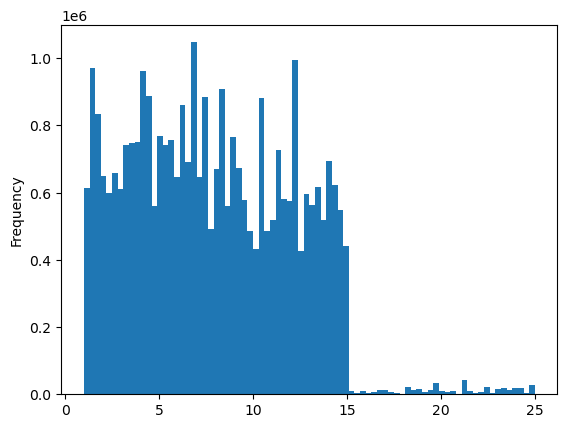

In [46]:
ords_prods_merge['prices'].plot.hist(bins = 80)

<Axes: ylabel='Frequency'>

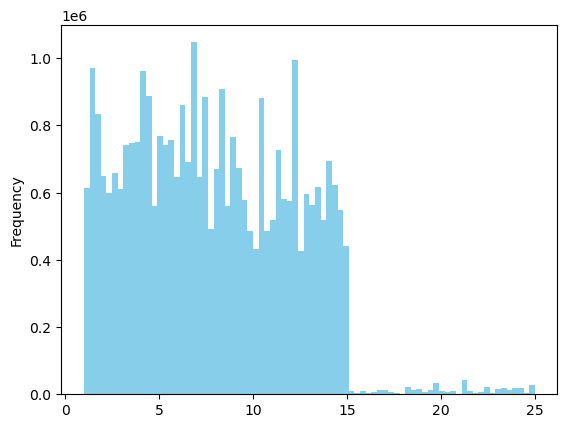

In [49]:
# Plot the histogram with a custom color
ords_prods_merge['prices'].plot.hist(bins=80, color='skyblue')

#### Save Histogram 

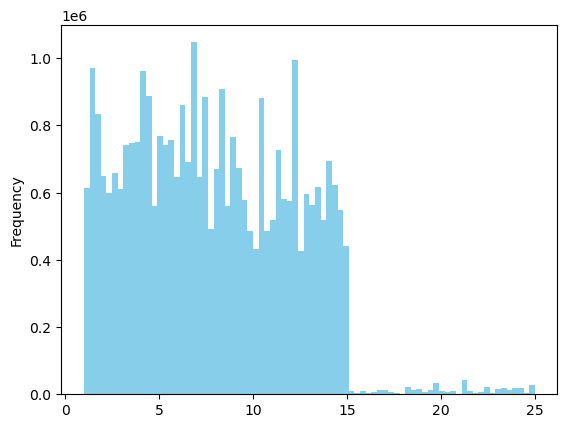

In [53]:
price_distribution_histogram = ords_prods_merge['prices'].plot.hist(bins=80, color='skyblue')

#### Export Histogram 

In [54]:
price_distribution_histogram.figure.savefig(r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations\price_distribution_histogram')

## Creating Line Chart

### Create a Data Sample

In [86]:
## splitting the dataframe into two dataframes at a 70/30 ratio & Create a Sample data set

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [87]:
## Store 70% of the sample as dataframe big

big=ords_prods_merge[dev]

In [58]:
big.shape

(22683761, 26)

In [88]:
## Store 30% of the sample as dataframe small 

small=ords_prods_merge[~dev]

In [62]:
small.shape

(9721098, 26)

#### Check the correctness of sample

In [63]:
len(ords_prods_merge)

32404859

In [64]:
len(big) + len(small)

32404859

#### Create another df (df_2) with small sample with only orders_day_of_week & prices

In [65]:
df_2 = small[['orders_day_of_week','prices']]

In [66]:
df_2.shape

(9721098, 2)

### Create Line chart with df_2

C:\Users\inesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\inesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


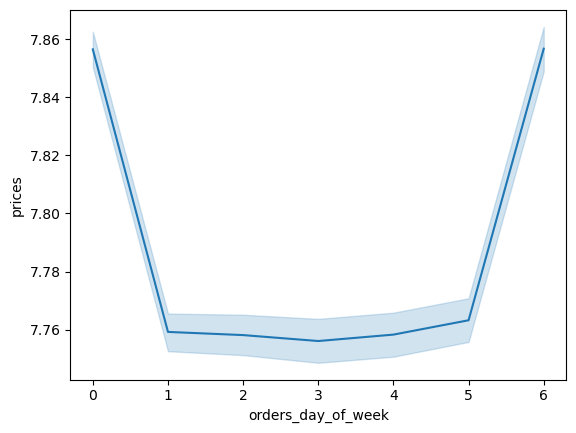

In [68]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Part_2 Q1: import most up-to-date project data (i.e., the data set with your new customer data from the first part of this task)

In [5]:
## Import instacart_ords_prods_customer_merge.pkl data set as instacart_merge

instacart_merge=pd.read_pickle(r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024\02 Data\Prepared Data\Prepared pkl files\instacart_ords_prods_customer_merge.pkl')

In [10]:
instacart_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_from_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,first_name,last_name,gender,state,age,date_joined,dependant_no,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,195,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,195,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,195,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [8]:
instacart_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_from_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', 'merge_indicator',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spending flag', 'frequency_of_purchase',
       'order frequency flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'dependant_no', 'family_status', 'income',
       '_merge'],
      dtype='object')

In [13]:
instacart_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                int64   
 2   order_number           int64   
 3   orders_day_of_week     int64   
 4   order_hour_of_day      int64   
 5   days_from_last_order   float64 
 6   product_id             int64   
 7   add_to_cart_order      int64   
 8   reordered              int64   
 9   Unnamed: 0             int64   
 10  product_name           object  
 11  aisle_id               int64   
 12  department_id          int64   
 13  prices                 float64 
 14  merge_indicator        category
 15  price_range_loc        object  
 16  busiest_day            object  
 17  busiest_days           object  
 18  busiest_period_of_day  object  
 19  max_order              int64   
 20  loyalty_flag           object  
 21  average_spending       float6

In [14]:
## Drop Unnamed: 0 column as it does not have any meaning

instacart_merge = instacart_merge.drop(columns=['Unnamed: 0'])

In [15]:
instacart_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                int64   
 2   order_number           int64   
 3   orders_day_of_week     int64   
 4   order_hour_of_day      int64   
 5   days_from_last_order   float64 
 6   product_id             int64   
 7   add_to_cart_order      int64   
 8   reordered              int64   
 9   product_name           object  
 10  aisle_id               int64   
 11  department_id          int64   
 12  prices                 float64 
 13  merge_indicator        category
 14  price_range_loc        object  
 15  busiest_day            object  
 16  busiest_days           object  
 17  busiest_period_of_day  object  
 18  max_order              int64   
 19  loyalty_flag           object  
 20  average_spending       float64 
 21  spending flag          object

## Q3: Provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day”s

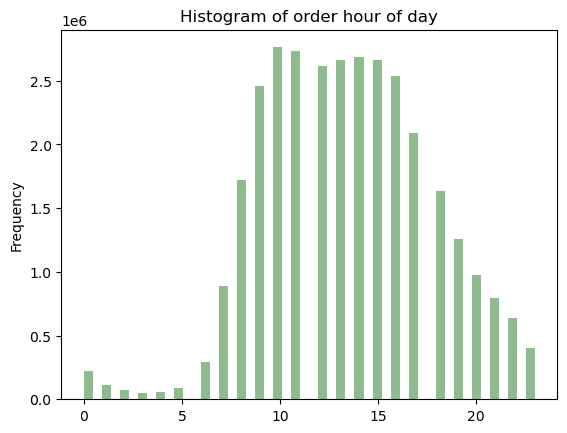

In [19]:
plt.title('Histogram of order hour of day')
hist_order_hour_of_day=instacart_merge['order_hour_of_day'].plot.hist(bins=50, color='darkseagreen')


#### Most sales happen between 9 hours and 16 hours and at10 hours records the highest. The least sales hours are 0 hours and 5 hours

In [21]:
hist_order_hour_of_day.figure.savefig(r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations\hist_order_hour_of_day.png')

## Q4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [22]:
instacart_merge['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [37]:
# Specify the color name
chocolate = 'Chocolate'


# Specify the number of colors
num_colors = 3

# Create a list of colors with repetitions of 'limegreen'
colors = [chocolate] * num_colors


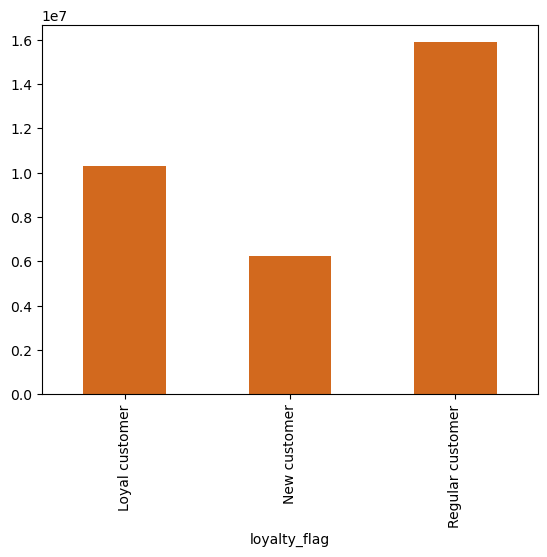

In [43]:
bar_loyalty_flag = instacart_merge['loyalty_flag'].value_counts().sort_index(ascending=True).plot.bar(color='chocolate')

<Figure size 500x200 with 0 Axes>

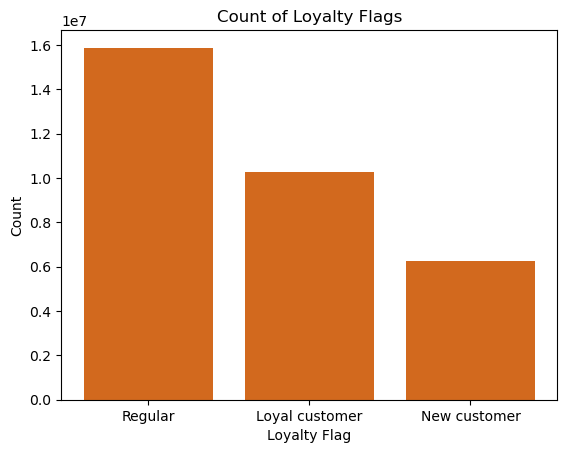

<Figure size 500x200 with 0 Axes>

In [59]:
# Get the value counts of loyalty flags and sort them in descending order
loyalty_flag_counts = instacart_merge['loyalty_flag'].value_counts().sort_values(ascending=False)

# Get the unique loyalty flag categories and their counts
loyalty_flags = loyalty_flag_counts.index
counts = loyalty_flag_counts.values

# Define the custom order of loyalty flag categories
custom_order = ['Regular', 'Loyal customer', 'New customer']

# Plot the bar chart with custom order
bar_loyalty_flag = plt.bar(custom_order, counts, color='chocolate')

# Set the title and axis labels
plt.title('Count of Loyalty Flags')
plt.xlabel('Loyalty Flag')
plt.ylabel('Count')
plt.figure(figsize=(5, 2))


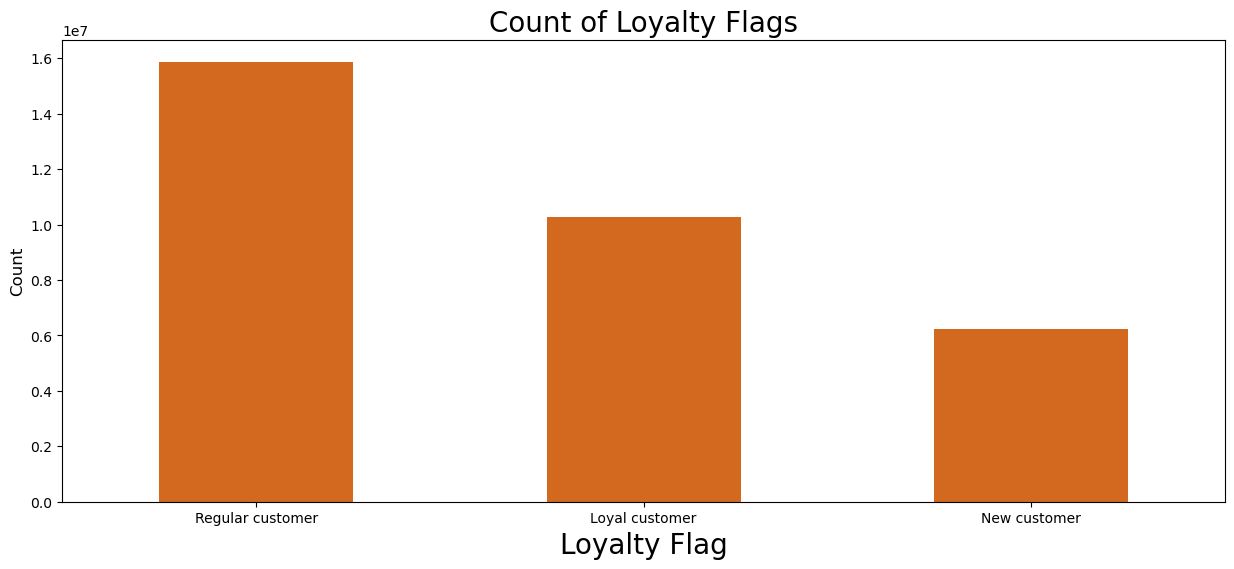

In [81]:
# Create a larger figure with specified size
plt.figure(figsize=(15, 6))

# Plot the loyalty flag counts
loyalty_flag_counts.plot(kind='bar', color='chocolate')

# Set title and labels with adjusted font size
plt.title('Count of Loyalty Flags', fontsize=20)
plt.xlabel('Loyalty Flag', fontsize=20)
plt.ylabel('Count', fontsize=12)

# Adjust the font size of x-axis tick labels
plt.tick_params(axis='x', labelsize=8) 

# Adjust the font size and direction of x-axis tick labels
plt.tick_params(axis='x', labelsize=10, rotation=360)

# Save the plot as a PNG file
plt.savefig(r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations\customer_loyalty.png')



#### Instacart has more regular customer than loyal customers. New customers represent the smallest value of loyalty categorisation 

## Q5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

### Select only necessary columns for line chart

In [90]:
# To improve the speed, reducing your samples to only those columns necessary for the chart

df_3 = small[['order_hour_of_day','average_spending']]

In [94]:
df_3.shape

(9721098, 2)

C:\Users\inesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\inesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


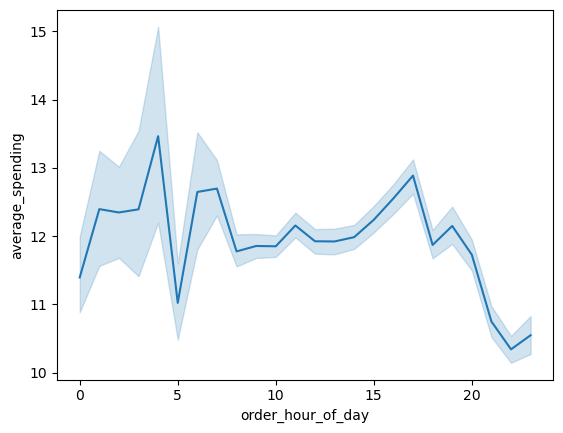

In [96]:
line2=sns.lineplot(data=df_3,x='order_hour_of_day',y='average_spending')

#### At the time of 04-06 and 17 hours spending is highest. Time has effect on spending of customers

In [97]:
line2.figure.savefig(r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations\spending_by_order_hours_of_day.png')

## Q6: Explor the connections between age and number of dependents

In [100]:
instacart_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                int64   
 2   order_number           int64   
 3   orders_day_of_week     int64   
 4   order_hour_of_day      int64   
 5   days_from_last_order   float64 
 6   product_id             int64   
 7   add_to_cart_order      int64   
 8   reordered              int64   
 9   product_name           object  
 10  aisle_id               int64   
 11  department_id          int64   
 12  prices                 float64 
 13  merge_indicator        category
 14  price_range_loc        object  
 15  busiest_day            object  
 16  busiest_days           object  
 17  busiest_period_of_day  object  
 18  max_order              int64   
 19  loyalty_flag           object  
 20  average_spending       float64 
 21  spending flag          object

In [106]:
df_4 = instacart_merge[['age','dependant_no']]

C:\Users\inesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\inesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\inesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\inesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

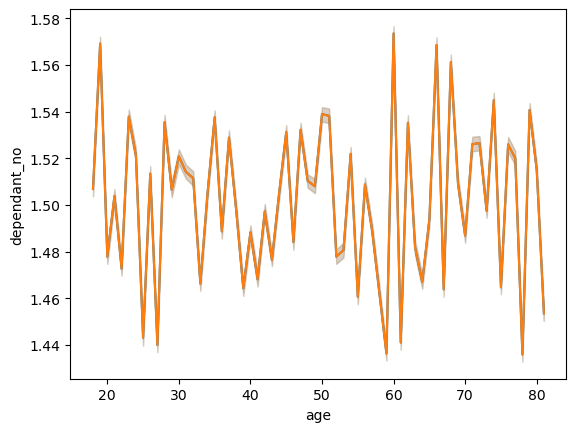

In [109]:
line3=sns.lineplot(data=df_4,x='age',y='dependant_no')

#### It is difficult to identify any relationship between age and numbr of dependant variabals

In [110]:
line3.figure.savefig(r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations\age_and_number_of_dependents.png')

## Q7:connection between age and spending power (income). Visualize this relationship, create a scatterplot using the sns.scatterplot() function.

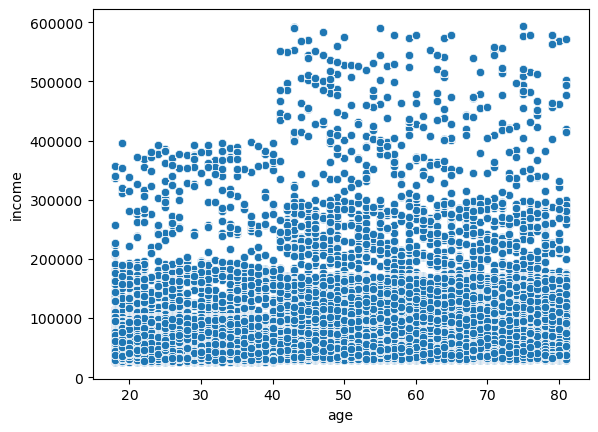

In [111]:
scatter=sns.scatterplot(x='age',y='income',data=instacart_merge)

#### Customer Income is increasing after age 40 & there is a relationship between customer age & spending power